# Practical Exercises 

Lateralization of auditory responses
1. Is there lateralization of auditory responses? <br/>
a. Make a plot of the EEG evoked response (average) for the left and the right stimuli. <br/>
b. Make a difference plot of left−right stimuli. <br/> <p></p>

2.  Is the peak changed by a lower low pass setting, e.g. 30 Hz?


In [25]:
%matplotlib inline

In [26]:
import os
import numpy as np
import mne

In [27]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif') #.fif only 2GB. 
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /home/victormp/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


Fitting ICA to data using 364 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 4.9s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


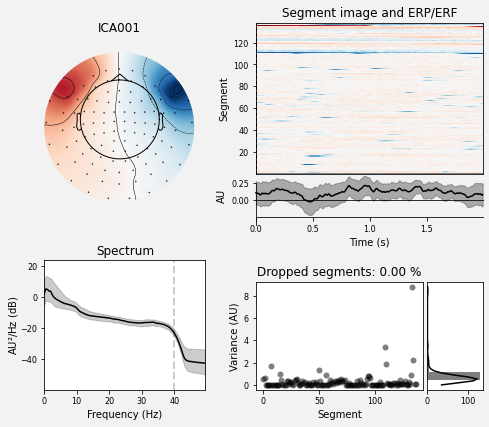

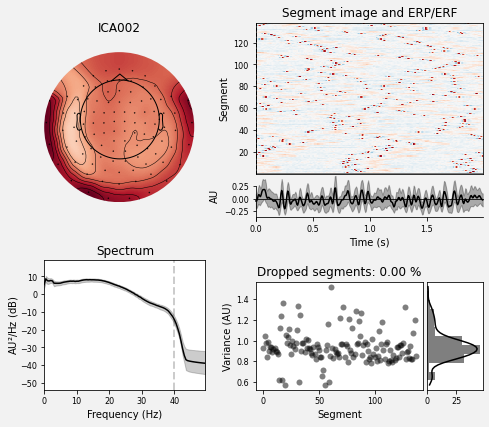

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [28]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

## item 1: clear eyeblink, the diapoles. 
## item 2: heartbeat artefact, halo. 

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Transforming to ICA space (20 components)
Zeroing out 2 ICA components


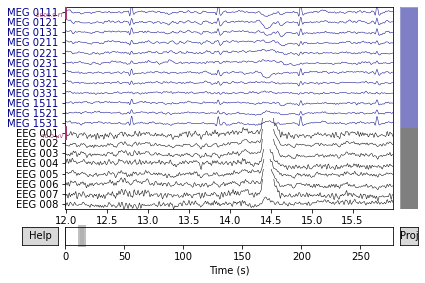

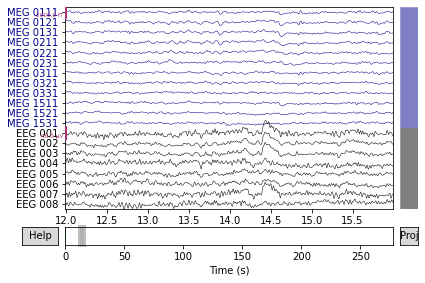

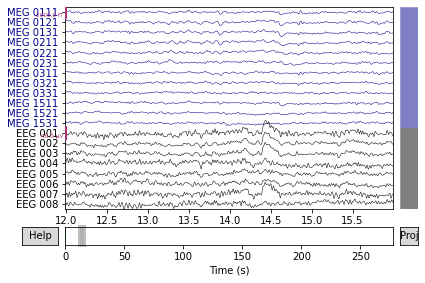

In [29]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

In [30]:
events = mne.find_events(raw, stim_channel='STI 014') #looking trough all channels, when is stimulus presented. 
print(events[:5])  # show the first 5 (numpy array)

## Trigger in digital (stimulus) channel: physical number. looking for deviation from 0. 

319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


In [31]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32} #Triggers. 

#Coding with forward-slash. Classic dictionary. 
print(event_dict)

{'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3, 'visual/right': 4, 'smiley': 5, 'buttonpress': 32}


In [32]:
reject_criteria = dict(mag=4000e-15,     # 4000 fT
                       grad=4000e-13,    # 4000 fT/cm
                       eeg=150e-6,       # 150 µV
                       eog=250e-6)       # 250 µV

In [33]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5, #ms. before trigger. 
                    reject=reject_criteria, preload=True) #based on reject_criteria (above - hard threshold). 

## EOG: probably a lot of eye-blinks. 
## events: does it for any of our events (buttonpress, smiley, visual/right, etc.)
## if one channel is bad the epoch is dropped for all channels. 
## another approach (with a bad channel) is to drop the bad channel. 

Not setting metadata
Not setting metadata
319 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 319 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
10 bad epochs dropped


In [40]:
conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place

## for the difference between left and right: 
audL_epochs = epochs['auditory/left']
audR_epochs = epochs['auditory/right']

## for just right: 
aud_epochs = epochs['auditory']


Dropped 0 epochs: 


In [42]:
audL_evoked_avg = audL_epochs.average() #averaging across epochs
audR_evoked_avg = audR_epochs.average()
aud_evoked_avg = aud_epochs.average()

In [48]:
## Average EEG evoked response: 

In [53]:
%matplotlib inline

combining channels using "gfp"


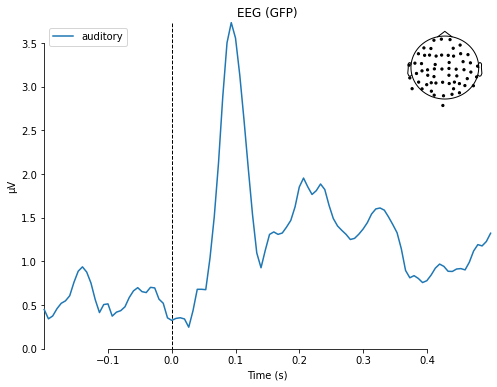

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


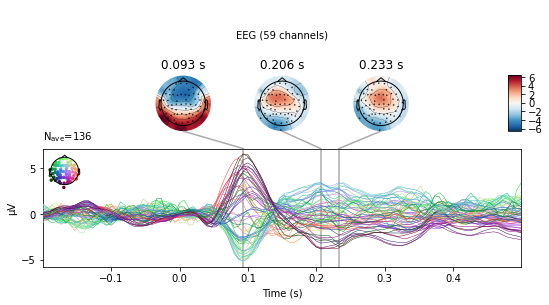

In [62]:
mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked_avg), 
                             picks = "eeg",
                             legend='upper left', 
                             show_sensors='upper right');

aud_evoked_avg.plot_joint(picks='eeg');


In [36]:
%matplotlib qt

In [37]:
## Difference plot (Question 1b)

In [38]:
evoked_diff = mne.combine_evoked([audL_evoked_avg, audR_evoked_avg], weights=[1, -1]) #one minus the other (diff.)
evoked_diff.pick_types(meg=False, eeg = True).plot_topo(color='r', legend=False);

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
